In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:


Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: 

((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)


In [3]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)


In [5]:
test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [7]:
train_set.columns=col_labels
test_set.columns=col_labels

In [8]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [9]:
#combining both the datasets
df=pd.concat([train_set,test_set])
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [10]:
df.shape

(48842, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [12]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [13]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [14]:
#there are some ? as values for features. Let us replace them with nan value
df.replace(' ?', np.nan, inplace=True)

In [15]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [16]:
df['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [17]:
df.replace({'wage_class':{' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1}},inplace=True)

In [18]:
df['wage_class']

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 48842, dtype: int64

## Feature Engineering

##age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


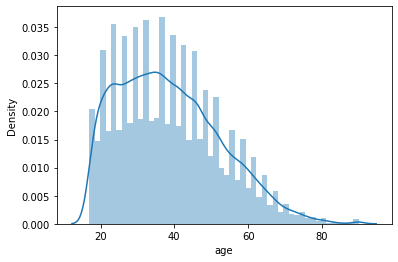

In [ ]:
sns.distplot(df['age'])

#workclass

In [19]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [27]:
#never worked and without pay are same and less in number hence combining both
df.replace({' Without-pay':' Never-worked'},inplace=True)
df.replace({'workclass':{np.nan :'other'}},inplace=True)

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'other', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

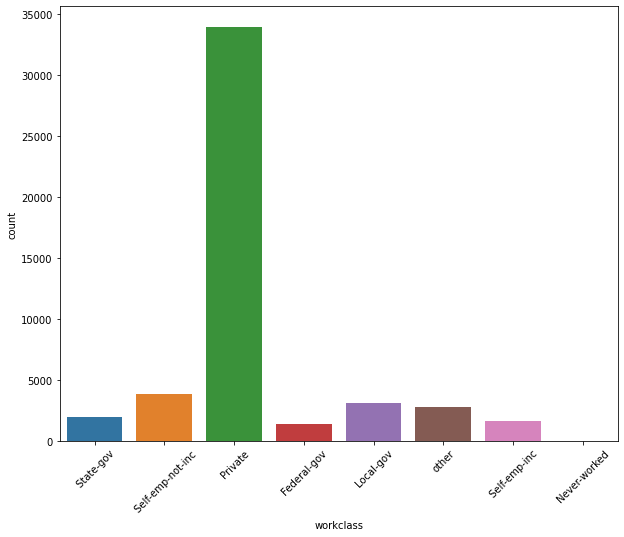

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=45)

#fnlwgt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


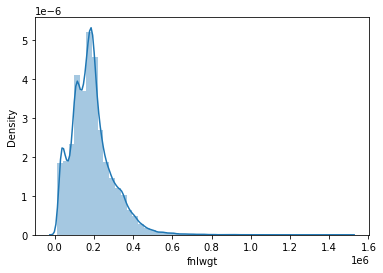

In [29]:
sns.distplot(df['fnlwgt'])

In [30]:
#take log of fnlwgt to control skewness in graph
df['fnlwgt']=np.log(df['fnlwgt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


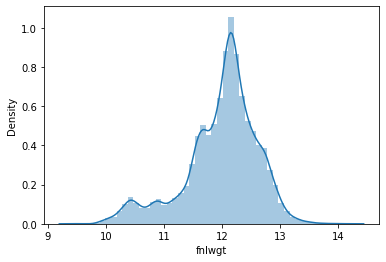

In [31]:
sns.distplot(df['fnlwgt'])

#education

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

<Figure size 720x720 with 0 Axes>

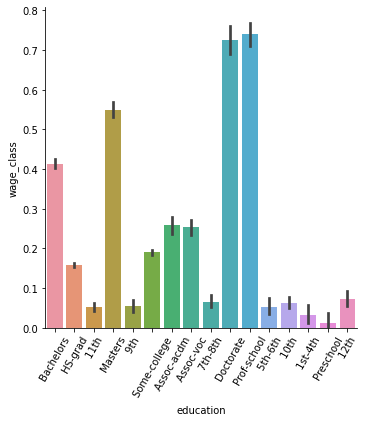

In [32]:
plt.figure(figsize=(10,10))
sns.catplot(x=df['education'],y=df['wage_class'],data=df,kind='bar')
plt.xticks(rotation=60)

In [33]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [34]:
#combining 1st to 12th std result into 1st to 12th group. 
def use(x):
  if x in [' 11th', ' 9th',' 7th-8th',' 5th-6th', ' 10th', ' 1st-4th', ' 12th']:
    return '1st to 12th'
  else:
    return x

In [35]:
df['education']=df['education'].apply(use)
df['education'].unique()

array([' Bachelors', ' HS-grad', '1st to 12th', ' Masters',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school', ' Preschool'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

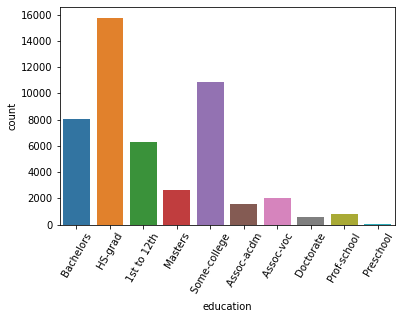

In [37]:
sns.countplot(df['education'])
plt.xticks(rotation=60)

#education_num

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


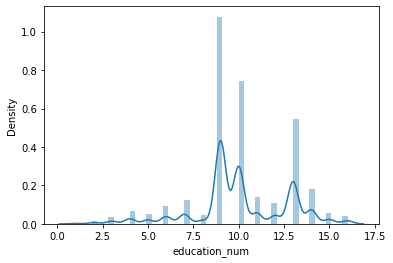

In [38]:
sns.distplot(df['education_num'])

#marital-status

In [39]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

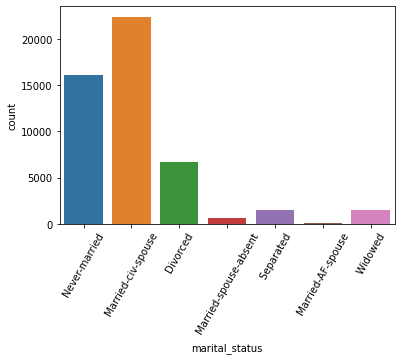

In [40]:
sns.countplot(df['marital_status'])
plt.xticks(rotation=60)

In [41]:
df['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

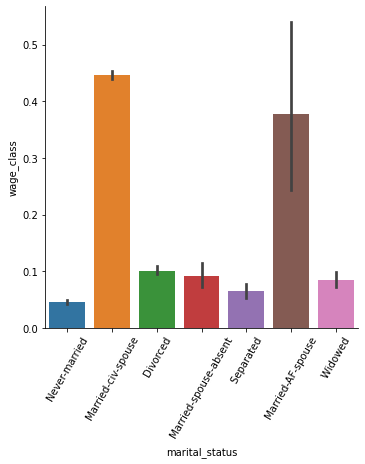

In [43]:
sns.catplot(df['marital_status'],df['wage_class'],data=df,kind='bar')
plt.xticks(rotation=60)

In [48]:
#we can combine civ and af spouses
df['marital_status'].replace(' Married-AF-spouse',' Married-civ-spouse',inplace=True)

In [49]:
df['marital_status'].value_counts()

 Married-civ-spouse       22416
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
Name: marital_status, dtype: int64

#Occupation

In [50]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

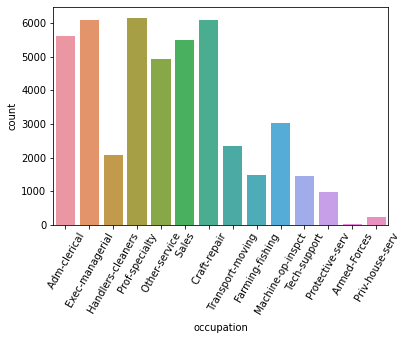

In [52]:
sns.countplot(df['occupation'])
plt.xticks(rotation=60)

In [53]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [54]:
df['occupation'].isna().sum()

2809

In [55]:
#armed forces are less in number. We can add them into nan values. Let us call nan values as other group
df['occupation'].replace(np.nan,'other-group',inplace=True)

In [56]:
df['occupation'].isna().sum()

0

In [57]:
df['occupation'].replace(' Armed-Forces','other-group',inplace=True)

In [58]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
other-group           2824
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
Name: occupation, dtype: int64

#relationship

In [59]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

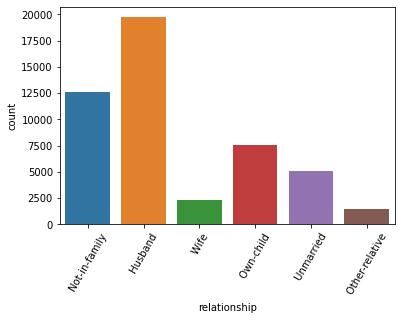

In [60]:
sns.countplot(df['relationship'])
plt.xticks(rotation=60)

#race

In [61]:
df['race'].value_counts()

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

#sex

In [62]:
df['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

#capital gain

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


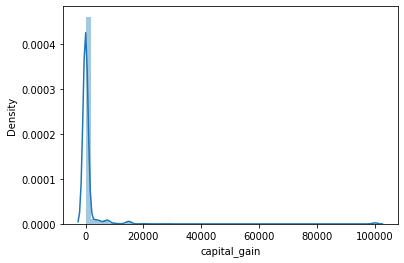

In [63]:
sns.distplot(df['capital_gain'])

In [64]:
df['capital_gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital_gain, Length: 123, dtype: int64

#native country

In [65]:
df['native_country'].value_counts()

 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

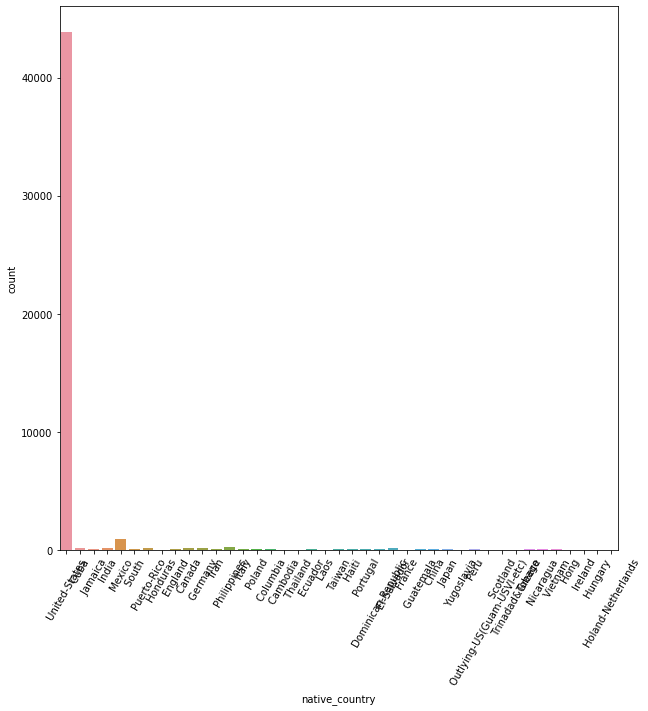

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(df['native_country'])
plt.xticks(rotation=60)

In [70]:
#combining countries based on continent
def region(x):
  if x in [' Laos',' India',' China',' Japan',' Iran',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan',' Vietnam']:
    return 'Asia'
  elif x in [' Mexico',' United-States',' Canada',' Cuba',' Jamaica',' Haiti',' Puerto-Rico',' El-Salvador',' Dominican-Republic',' Guatemala',' Nicaragua'
               ,' Trinadad&Tobago',' Outlying-US(Guam-USVI-etc)',' Honduras']:
    return 'North America'
  elif x in [' Columbia',' South',' Peru',' Ecuador',' ']:
    return 'South America'
  elif x in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
    return 'Europe'


In [71]:
df['native_country']=df['native_country'].apply(region)

In [75]:
df['native_country'].value_counts()

North America    45933
Asia               981
Europe             780
South America      291
Name: native_country, dtype: int64

In [76]:
df['native_country'].isna().sum()

857

In [77]:
df['native_country'].replace(np.nan,'other',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

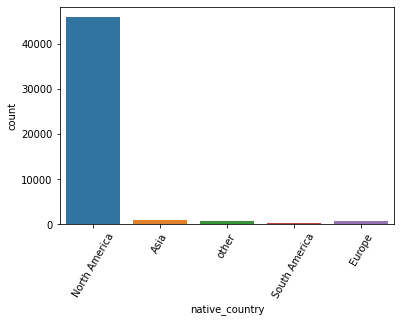

In [78]:
sns.countplot(df['native_country'])
plt.xticks(rotation=60)

In [79]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

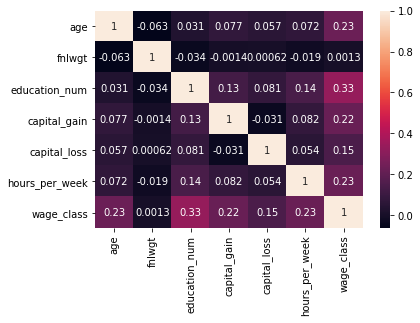

In [81]:
#correlation
corr=df.corr()
sns.heatmap(corr,annot=True)

In [82]:
#splitting data into input and output
x=df.drop(columns=['wage_class'],axis=1)
y=df['wage_class']

In [89]:
#one hot encoding
x1=pd.get_dummies(x,drop_first=True)
x1.shape


(48842, 54)

In [92]:
#train test split
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [93]:
x_train=x1[:32561]
x_test=x1[32561:x1.shape[0]]

In [94]:
x_train.shape,x_test.shape

((32561, 54), (16281, 54))

In [95]:
#normalisation of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [96]:
x_train_scaled

array([[ 0.03067056, -1.15029403,  1.13473876, ...,  0.25397326,
        -0.07821827, -0.13502327],
       [ 0.83710898, -1.03598889,  1.13473876, ...,  0.25397326,
        -0.07821827, -0.13502327],
       [-0.04264203,  0.47186767, -0.42005962, ...,  0.25397326,
        -0.07821827, -0.13502327],
       ...,
       [ 1.42360965, -0.08359548, -0.42005962, ...,  0.25397326,
        -0.07821827, -0.13502327],
       [-1.21564337,  0.36421796, -0.42005962, ...,  0.25397326,
        -0.07821827, -0.13502327],
       [ 0.98373415,  0.93017251, -0.42005962, ...,  0.25397326,
        -0.07821827, -0.13502327]])

In [100]:
y.shape

(48842,)

In [102]:
y_train=y[:32561]
y_test=y[32561:x.shape[0]]

In [103]:
y_train.shape,y_test.shape

((32561,), (16281,))

In [104]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,0
1,50,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North America,0


In [107]:
y_train.head(2)

0    0
1    0
Name: wage_class, dtype: int64

In [108]:
#applying xgboost
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
y_pred=model.predict(scaler.transform(x_test))
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [111]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8702168171488238

In [112]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11861,   574],
       [ 1539,  2307]])

In [113]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92     12435\n           1       0.80      0.60      0.69      3846\n\n    accuracy                           0.87     16281\n   macro avg       0.84      0.78      0.80     16281\nweighted avg       0.87      0.87      0.86     16281\n'

In [114]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
auc

0.7768419807962402

In [ ]:
auc